#  作業

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框

In [121]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.png')

## Hint: 矩形

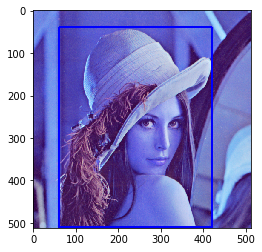

In [122]:
img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (0, 0, 255), 3)

plt.imshow(img_rect)

## Hint: 線

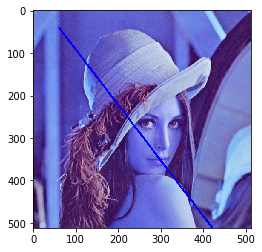

In [123]:
img_line = img.copy()
cv2.line(img_line, (60, 40), (420, 510), (0, 0, 255), 3)

plt.imshow(img_line)

## Hint: 文字

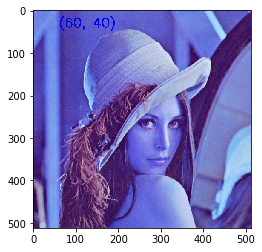

In [124]:
img_text = img.copy()
cv2.putText(img_text, '(60, 40)', (60, 40), 0, 1, (0, 0, 255), 2)

plt.imshow(img_text)

##  解法二

如果希望得知矩型邊框的位置

1. 顏色的操作 (對明亮度做直方圖均衡)
2. 鏡像可以透過四則運算得知
3. 透過建構 transformation matrix 做縮放
4. 把矩型邊框的點與 transformation matrix 相乘就會得到縮放後的位置
5. 畫圖

得到的圖的結果正確，同時也知道新的矩型邊框座標點

In [125]:
img_hw = img.copy()
img_hw.shape[:2]

(512, 512)

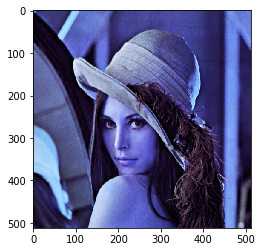

In [91]:
img_hw = img.copy()
point1 = [60, 40]
point2 = [420, 510]

"""
對明亮度做直方圖均衡
"""
# 原始 BGR 圖片轉 HSV 圖片
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡
img_hw[:,:,2] = cv2.equalizeHist(img_hw[:,:,2])

# 將圖片轉回 BGR
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2BGR)

"""
水平鏡像
"""
h, w = img_hw.shape[:2]

# 圖片鏡像
img_hw = img_hw[:,::-1,:]

plt.imshow(img_hw)

In [92]:
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)

In [110]:
resize_col

128

In [102]:
# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1[0] = w - point1[0]
point2[0] = w - point2[0]

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)

# 建構 scale matrix
M_scale = np.array([[0.5,0,0],[0,0.5,0]])
img_hw = cv2.warpAffine(img_hw, M_scale,(resize_row,resize_col))

(256, 256, 3)


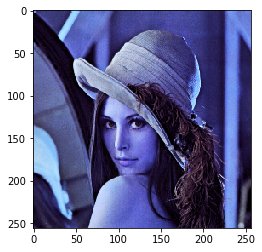

In [106]:
print(img_hw.shape)
plt.imshow(img_hw)

In [107]:
M_scale = np.array([[0.5,0,0],[0,0.5,0]])
img_hw = cv2.warpAffine(img_hw, M_scale,(resize_row,resize_col))

(128, 128, 3)


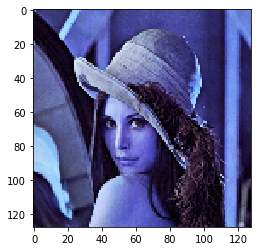

In [109]:
print(img_hw.shape)
plt.imshow(img_hw)

origin point1=[60, 40], origin point2=[420, 510]
resize point1=(30, 20), resize point2=(210, 255)


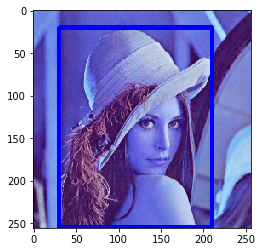

In [126]:

# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1[0] = w - point1[0]
point2[0] = w - point2[0]

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)

# 建構 scale matrix
M_scale = np.array([[0.5,0,0],[0,0.5,0]])
img_hw = cv2.warpAffine(img_hw, M_scale,(resize_row,resize_col))

# 把左上跟右下轉為矩陣型式
bbox = np.array((point1, point2), dtype=np.float32)
#print('M_scale.shape={}, bbox.shape={}'.format(M_scale.shape, bbox.shape))

# 做矩陣乘法可以使用 `np.dot`, 為了做矩陣乘法, M_scale 需要做轉置之後才能相乘
homo_coor_result = np.dot(M_scale.T, bbox)
homo_coor_result = homo_coor_result.astype('uint8')
#print(homo_coor_result)
scale_point1 = tuple(homo_coor_result[0])
scale_point2 = tuple(homo_coor_result[1])
print('origin point1={}, origin point2={}'.format(point1, point2))
print('resize point1={}, resize point2={}'.format(scale_point1, scale_point2))

# 畫圖
cv2.rectangle(img_hw, scale_point1, scale_point2, (0, 0, 255), 3)

plt.imshow(img_hw)

##  解法三 (optional)

把矩型邊框用遮罩的方式呈現，使用同樣處理圖片的方式處理遮罩
最後再找遮罩的左上跟右下的點的位置

這邊會用到許多沒提過的東西，所以當作 optional

start_x = 46, start_y = 20
end_x = 225, end_y = 254


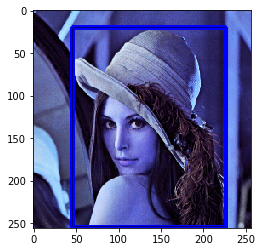

In [43]:
point1 = [60, 40]
point2 = [420, 510]

mask = np.zeros((img.shape[0],img.shape[1],3))
img_mask = img.copy()
for j in range(point1[1],point2[1]):
    for i in range(point1[0],point2[0]):
        if(not(i>point1[0] and i<point2[0]-1 and j>point1[1] and j<point2[1]-1)):
            mask[j,i,2]=255

fx = 0.5
fy = 0.5
mask = cv2.resize(mask,(resize_col,resize_col),cv2.INTER_NEAREST)
mask = mask[:,::-1,:]
pos_start = np.zeros([1,2])
pos_end = np.zeros((1,2))

start_x = 0
start_y = 0

while (mask[start_y,start_x,2]==0):
    start_x += 1
    if(start_x==resize_row):
        start_x = 0
        start_y += 1

end_x = resize_col - 1
end_y = resize_row - 1

while (mask[end_y,end_x,2]==0):
    end_x -= 1
    if(end_x==0):
        end_x = resize_col - 1
        end_y -= 1

for j in range(0, resize_row):
    for i in range(0, resize_col):
        if(mask[j,i,2]!=0):
            img_hw[j,i,:]=mask[j,i,:]

print(f'start_x = {start_x}, start_y = {start_y}')
print(f'end_x = {end_x}, end_y = {end_y}')

plt.imshow(img_hw)